## Generate QC report of the whole image quality control flags

## Import libraries

In [ ]:
import pandas as pd
import pathlib
import re

import seaborn as sns
from upsetplot import from_indicators, plot
import matplotlib.pyplot as plt

import warnings

# Ignore upset plot warning regarding  behavior change that will occur in pandas 3.0
warnings.filterwarnings("ignore", category=FutureWarning, module="upsetplot")

# Set paths and load in data

In [2]:
# Output directory for plots
output_directory = pathlib.Path("./qc_plots")
output_directory.mkdir(exist_ok=True)

# path to illumination directory with the qc results and ic functions
illum_directory = pathlib.Path("../illum_directory")

# Find all Image.csv files in the directory
csv_files = list(illum_directory.rglob("Image.csv"))

# Load and concatenate all CSV files
prefixes = ("Metadata_", "ImageQuality_PercentMaximal", "ImageQuality_PowerLogLogSlope")
dataframes = [
    pd.read_csv(csv_file, usecols=lambda col: col.startswith(prefixes))
    for csv_file in csv_files
]
combined_df = pd.concat(dataframes, ignore_index=True)

print(combined_df.shape)
combined_df.head()

(11760, 19)


,ImageQuality_PercentMaximal_OrigActin,ImageQuality_PercentMaximal_OrigDNA,ImageQuality_PercentMaximal_OrigER,ImageQuality_PercentMaximal_OrigMito,ImageQuality_PercentMaximal_OrigPM,ImageQuality_PowerLogLogSlope_OrigActin,ImageQuality_PowerLogLogSlope_OrigDNA,ImageQuality_PowerLogLogSlope_OrigER,ImageQuality_PowerLogLogSlope_OrigMito,ImageQuality_PowerLogLogSlope_OrigPM,Metadata_Blur_Flag,Metadata_Channel,Metadata_FileLocation,Metadata_Frame,Metadata_Plate,Metadata_Saturation_Flag,Metadata_Series,Metadata_Site,Metadata_Well
0,0.016573,0.019199,0.131439,0.000082,0.000082,-1.602380,-2.273084,-1.942974,-2.136100,-2.355989,1,NaN,NaN,0,CARD-CelIns-CX7_250523100002,1,0,f00,B02
1,0.006071,0.222101,0.511972,0.000082,0.059566,-1.693571,-2.279173,-1.821807,-1.941154,-2.284056,1,NaN,NaN,0,CARD-CelIns-CX7_250523100002,1,0,f01,B02
2,0.000082,0.004020,0.000082,0.000082,0.000082,-1.135968,-1.928907,-1.592809,-1.601165,-1.768191,0,NaN,NaN,0,CARD-CelIns-CX7_250523100002,0,0,f02,B02
3,0.000082,0.000082,0.000082,0.000082,0.000082,-1.109126,-1.928441,-1.660487,-1.736357,-1.964689,0,NaN,NaN,0,CARD-CelIns-CX7_250523100002,0,0,f03,B02
4,0.000082,0.000082,0.000082,0.000082,0.000082,-1.284785,-1.988379,-1.794410,-1.959892,-2.161781,0,NaN,NaN,0,CARD-CelIns-CX7_250523100002,0,0,f04,B02


## Update plate names to be easier to read

In [3]:
# Extract numeric suffixes directly into a list
plate_names = combined_df["Metadata_Plate"].unique()
numeric_suffixes = [int(re.search(r"(\d+)$", name).group(1)) for name in plate_names]

# Zip names with their numeric part, sort by numeric value
sorted_plates = [name for _, name in sorted(zip(numeric_suffixes, plate_names))]

# Create the mapping to Plate_1, Plate_2, ...
plate_mapping = {name: f"Plate_{i+1}" for i, name in enumerate(sorted_plates)}

# Apply mapping
combined_df["Metadata_Plate"] = combined_df["Metadata_Plate"].map(plate_mapping)

print(combined_df.shape)
combined_df.head()

(11760, 19)


,ImageQuality_PercentMaximal_OrigActin,ImageQuality_PercentMaximal_OrigDNA,ImageQuality_PercentMaximal_OrigER,ImageQuality_PercentMaximal_OrigMito,ImageQuality_PercentMaximal_OrigPM,ImageQuality_PowerLogLogSlope_OrigActin,ImageQuality_PowerLogLogSlope_OrigDNA,ImageQuality_PowerLogLogSlope_OrigER,ImageQuality_PowerLogLogSlope_OrigMito,ImageQuality_PowerLogLogSlope_OrigPM,Metadata_Blur_Flag,Metadata_Channel,Metadata_FileLocation,Metadata_Frame,Metadata_Plate,Metadata_Saturation_Flag,Metadata_Series,Metadata_Site,Metadata_Well
0,0.016573,0.019199,0.131439,0.000082,0.000082,-1.602380,-2.273084,-1.942974,-2.136100,-2.355989,1,NaN,NaN,0,Plate_2,1,0,f00,B02
1,0.006071,0.222101,0.511972,0.000082,0.059566,-1.693571,-2.279173,-1.821807,-1.941154,-2.284056,1,NaN,NaN,0,Plate_2,1,0,f01,B02
2,0.000082,0.004020,0.000082,0.000082,0.000082,-1.135968,-1.928907,-1.592809,-1.601165,-1.768191,0,NaN,NaN,0,Plate_2,0,0,f02,B02
3,0.000082,0.000082,0.000082,0.000082,0.000082,-1.109126,-1.928441,-1.660487,-1.736357,-1.964689,0,NaN,NaN,0,Plate_2,0,0,f03,B02
4,0.000082,0.000082,0.000082,0.000082,0.000082,-1.284785,-1.988379,-1.794410,-1.959892,-2.161781,0,NaN,NaN,0,Plate_2,0,0,f04,B02


## Add flags per channel

In [4]:
# Start by assuming no channel is flagged
combined_df["Flagged_Saturation_Channel"] = "none"

# Set the columns for percent maximal (saturation)
percent_max_cols = [
    col for col in combined_df.columns if col.startswith("ImageQuality_PercentMaximal")
]

# Boolean mask where the Saturation flag is on
saturation_flagged_mask = combined_df["Metadata_Saturation_Flag"].astype(bool)

# Iterate through each PercentMaximal column and create a new boolean column per channel
for col in percent_max_cols:
    channel = col.replace("ImageQuality_PercentMaximal_", "")
    combined_df[f"{channel}_Saturated"] = saturation_flagged_mask & (
        combined_df[col] > 0.10
    )

print(combined_df.shape)
combined_df.head()

(11760, 25)


,ImageQuality_PercentMaximal_OrigActin,ImageQuality_PercentMaximal_OrigDNA,ImageQuality_PercentMaximal_OrigER,ImageQuality_PercentMaximal_OrigMito,ImageQuality_PercentMaximal_OrigPM,ImageQuality_PowerLogLogSlope_OrigActin,ImageQuality_PowerLogLogSlope_OrigDNA,ImageQuality_PowerLogLogSlope_OrigER,ImageQuality_PowerLogLogSlope_OrigMito,ImageQuality_PowerLogLogSlope_OrigPM,...,Metadata_Saturation_Flag,Metadata_Series,Metadata_Site,Metadata_Well,Flagged_Saturation_Channel,OrigActin_Saturated,OrigDNA_Saturated,OrigER_Saturated,OrigMito_Saturated,OrigPM_Saturated
0,0.016573,0.019199,0.131439,0.000082,0.000082,-1.602380,-2.273084,-1.942974,-2.136100,-2.355989,...,1,0,f00,B02,none,False,False,True,False,False
1,0.006071,0.222101,0.511972,0.000082,0.059566,-1.693571,-2.279173,-1.821807,-1.941154,-2.284056,...,1,0,f01,B02,none,False,True,True,False,False
2,0.000082,0.004020,0.000082,0.000082,0.000082,-1.135968,-1.928907,-1.592809,-1.601165,-1.768191,...,0,0,f02,B02,none,False,False,False,False,False
3,0.000082,0.000082,0.000082,0.000082,0.000082,-1.109126,-1.928441,-1.660487,-1.736357,-1.964689,...,0,0,f03,B02,none,False,False,False,False,False
4,0.000082,0.000082,0.000082,0.000082,0.000082,-1.284785,-1.988379,-1.794410,-1.959892,-2.161781,...,0,0,f04,B02,none,False,False,False,False,False


In [5]:
# dictionary with blur thresholds per channel
blur_thresholds = {
    "OrigActin": -1.8891791699802942,
    "OrigDNA": -2.2456075474546515,
    "OrigER": -2.2825812279725524,
    "OrigMito": -2.012531942517173,
    "OrigPM": -2.4309820530015642,
}

# Boolean mask for Blur flag
blur_flagged_mask = combined_df["Metadata_Blur_Flag"].astype(bool)

# Iterate through PowerLogLogSlope columns and apply thresholds
for col in combined_df.columns:
    if col.startswith("ImageQuality_PowerLogLogSlope_"):
        channel = col.replace("ImageQuality_PowerLogLogSlope_", "")
        if channel in blur_thresholds:
            threshold = blur_thresholds[channel]
            combined_df[f"{channel}_Blur"] = blur_flagged_mask & (
                combined_df[col] < threshold
            )

print(combined_df.shape)
combined_df.head()

(11760, 30)


,ImageQuality_PercentMaximal_OrigActin,ImageQuality_PercentMaximal_OrigDNA,ImageQuality_PercentMaximal_OrigER,ImageQuality_PercentMaximal_OrigMito,ImageQuality_PercentMaximal_OrigPM,ImageQuality_PowerLogLogSlope_OrigActin,ImageQuality_PowerLogLogSlope_OrigDNA,ImageQuality_PowerLogLogSlope_OrigER,ImageQuality_PowerLogLogSlope_OrigMito,ImageQuality_PowerLogLogSlope_OrigPM,...,OrigActin_Saturated,OrigDNA_Saturated,OrigER_Saturated,OrigMito_Saturated,OrigPM_Saturated,OrigActin_Blur,OrigDNA_Blur,OrigER_Blur,OrigMito_Blur,OrigPM_Blur
0,0.016573,0.019199,0.131439,0.000082,0.000082,-1.602380,-2.273084,-1.942974,-2.136100,-2.355989,...,False,False,True,False,False,False,True,False,True,False
1,0.006071,0.222101,0.511972,0.000082,0.059566,-1.693571,-2.279173,-1.821807,-1.941154,-2.284056,...,False,True,True,False,False,False,True,False,False,False
2,0.000082,0.004020,0.000082,0.000082,0.000082,-1.135968,-1.928907,-1.592809,-1.601165,-1.768191,...,False,False,False,False,False,False,False,False,False,False
3,0.000082,0.000082,0.000082,0.000082,0.000082,-1.109126,-1.928441,-1.660487,-1.736357,-1.964689,...,False,False,False,False,False,False,False,False,False,False
4,0.000082,0.000082,0.000082,0.000082,0.000082,-1.284785,-1.988379,-1.794410,-1.959892,-2.161781,...,False,False,False,False,False,False,False,False,False,False


## Plot the percentage of failed FOVs across plates regardless of condition

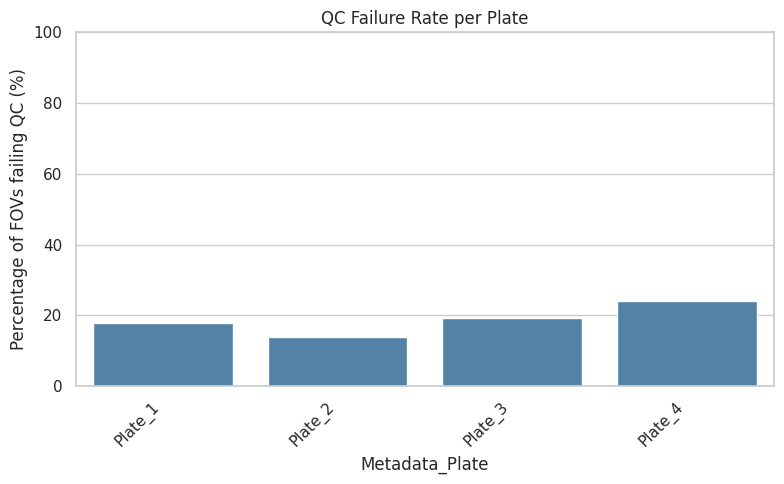

In [10]:
# Calculate percentage of rows that failed any QC check, grouped by plate
combined_df["Failed_Any"] = combined_df[
    ["Metadata_Blur_Flag", "Metadata_Saturation_Flag"]
].any(axis=1)
failed_percent_by_plate = (
    combined_df.groupby("Metadata_Plate")["Failed_Any"]
    .mean()
    .reset_index(name="Percent_Failed")
)
failed_percent_by_plate["Percent_Failed"] *= 100

# Create bar plot with a single color
plt.figure(figsize=(8, 5))
sns.barplot(
    data=failed_percent_by_plate,
    x="Metadata_Plate",
    y="Percent_Failed",
    color="steelblue",
)
plt.ylabel("Percentage of FOVs failing QC (%)")
plt.title("QC Failure Rate per Plate")
plt.ylim(0, 100)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.savefig(output_directory / "qc_failure_rate_per_plate.png", dpi=500)
plt.show()

## Plot percentage failed FOV based on blur or saturation regardless of channel

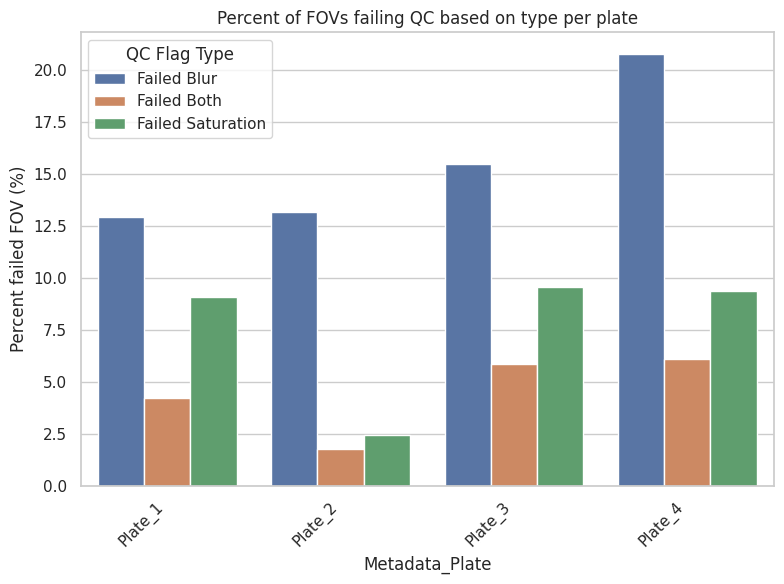

In [7]:
# Add a column for "failed both"
combined_df["Failed_Both"] = combined_df["Metadata_Saturation_Flag"].astype(
    bool
) & combined_df["Metadata_Blur_Flag"].astype(bool)

# Melt all three flag columns
flag_counts = combined_df.melt(
    id_vars="Metadata_Plate",
    value_vars=["Metadata_Saturation_Flag", "Metadata_Blur_Flag", "Failed_Both"],
    var_name="QC_Flag",
    value_name="Flagged",
)

# Convert to boolean if needed
flag_counts["Flagged"] = flag_counts["Flagged"].astype(bool)

# Clean up the legend labels
flag_counts["QC_Flag"] = flag_counts["QC_Flag"].map(
    {
        "Metadata_Saturation_Flag": "Failed Saturation",
        "Metadata_Blur_Flag": "Failed Blur",
        "Failed_Both": "Failed Both",
    }
)

# Count total per plate per flag type
total_counts = (
    flag_counts.groupby(["Metadata_Plate", "QC_Flag"]).size().reset_index(name="Total")
)

# Count number of failed flags
fail_counts = (
    flag_counts[flag_counts["Flagged"]]
    .groupby(["Metadata_Plate", "QC_Flag"])
    .size()
    .reset_index(name="Failed")
)

# Merge and compute percentage
qc_summary = pd.merge(
    total_counts, fail_counts, on=["Metadata_Plate", "QC_Flag"], how="left"
).fillna(0)
qc_summary["Percent_Failed"] = (qc_summary["Failed"] / qc_summary["Total"]) * 100

# Plot
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.barplot(data=qc_summary, x="Metadata_Plate", y="Percent_Failed", hue="QC_Flag")
plt.xticks(rotation=45, ha="right")
plt.ylabel("Percent failed FOV (%)")
plt.title("Percent of FOVs failing QC based on type per plate")
plt.legend(title="QC Flag Type")
plt.tight_layout()
plt.savefig(output_directory / "qc_failure_rate_by_flag_type_per_plate.png", dpi=500)
plt.show()

## Create upset plot for all plates in combination with the breakdown of channels failing QC

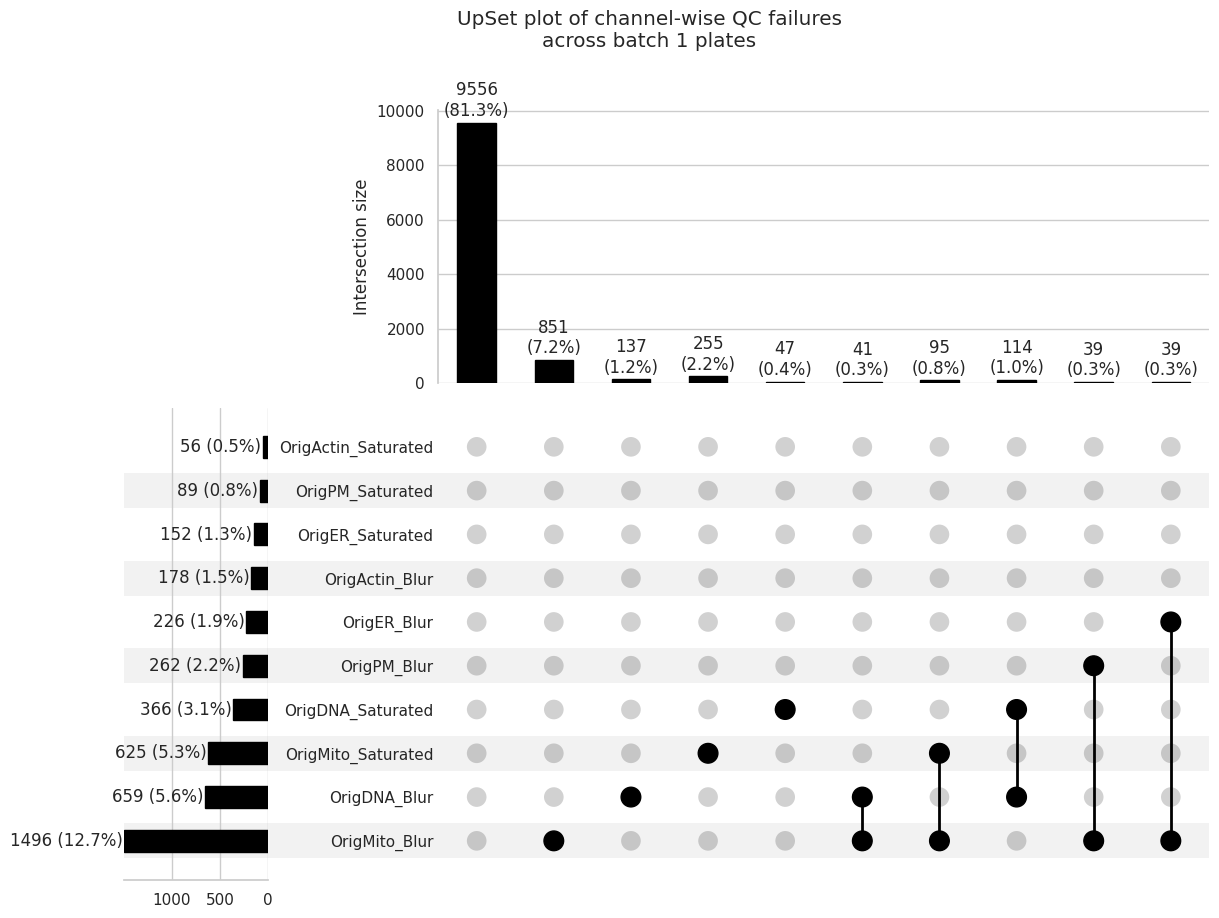

In [8]:
# Define the relevant QC columns
qc_columns = [
    "OrigActin_Saturated",
    "OrigDNA_Saturated",
    "OrigER_Saturated",
    "OrigMito_Saturated",
    "OrigPM_Saturated",
    "OrigActin_Blur",
    "OrigDNA_Blur",
    "OrigER_Blur",
    "OrigMito_Blur",
    "OrigPM_Blur",
]

# Make sure columns are boolean
qc_data = combined_df[qc_columns].astype(bool)

# Create the upset input
upset_data = from_indicators(qc_columns, qc_data)

# Create the figure with desired size
fig = plt.figure(figsize=(14, 10))  # Adjust the size as needed

# Plot the UpSet plot
plot(
    upset_data,
    fig=fig,
    element_size=None,
    show_counts=True,
    show_percentages=True,
    min_subset_size=30,
)
plt.suptitle("UpSet plot of channel-wise QC failures\nacross batch 1 plates")
plt.savefig(
    output_directory / "upset_plot_channel_qc_failures.png",
    bbox_inches="tight",
    dpi=500,
)
plt.show()

## Generate heatmap to visualize which channels and conditions most impact the failing image sets

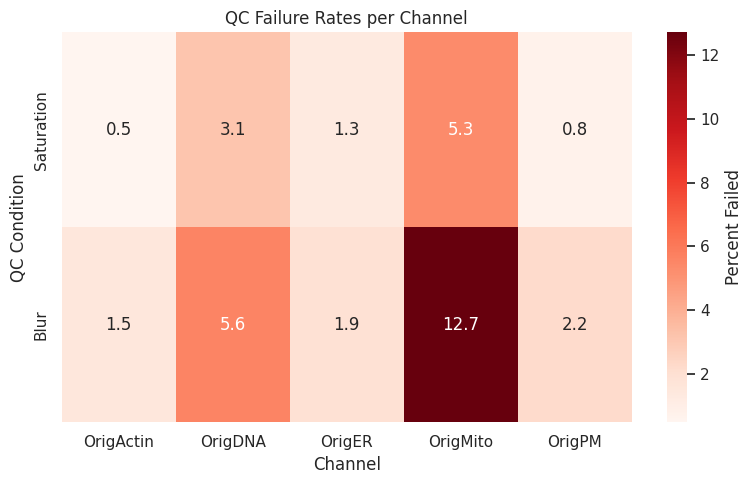

In [9]:
# Get boolean DataFrames for saturation and blur separately
sat_cols = [col for col in qc_columns if col.endswith("_Saturated")]
blur_cols = [col for col in qc_columns if col.endswith("_Blur")]

# Extract saturation and blur DataFrames
sat_df = qc_data[sat_cols]
blur_df = qc_data[blur_cols]

# Align columns so we can compare channels directly (remove suffixes for matching)
sat_df.columns = [col.replace("_Saturated", "") for col in sat_df.columns]
blur_df.columns = [col.replace("_Blur", "") for col in blur_df.columns]

# Calculate per-channel failure rates for each condition
sat_fail_rate = sat_df.mean() * 100
blur_fail_rate = blur_df.mean() * 100

# Combine into one DataFrame for plotting
heatmap_data = pd.DataFrame(
    {
        "Saturation": sat_fail_rate,
        "Blur": blur_fail_rate,
    }
)

plt.figure(figsize=(8, 5))
sns.heatmap(
    heatmap_data.T,
    annot=True,
    fmt=".1f",
    cmap="Reds",
    cbar_kws={"label": "Percent Failed"},
)
plt.title("QC Failure Rates per Channel")
plt.xlabel("Channel")
plt.ylabel("QC Condition")
plt.tight_layout()
plt.savefig(output_directory / "qc_failure_rates_heatmap.png", dpi=500)
plt.show()